# Panorama Stitcher

## Import packages

In [62]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Import images and resize

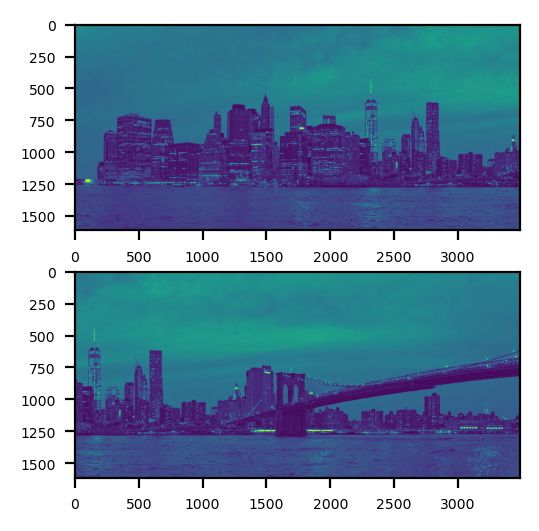

In [63]:
# array of images
images = []

# import images, resize x0.5, convert to greyscale
img_ = cv.imread("Images/left.jpg")
img_ = cv.resize(img_, (0,0), None, 0.5, 0.5)
img1 = cv.cvtColor(img_, cv.COLOR_BGR2GRAY)

# add image to array
images.append(img1)

img = cv.imread("Images/right.jpg")
img = cv.resize(img, (0,0), None, 0.5, 0.5)
img2 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

images.append(img2)

# display image
plt.rc('font', size=5)
fig, ax = plt.subplots(2, 1, figsize=(6, 3), dpi=200)
ax[0].imshow(img1)
ax[1].imshow(img2)
plt.show()

## Find descriptors

In [64]:
stitcher = cv.Stitcher.create()
(status, result) = stitcher.stitch(images)

#plt.imshow(result)

error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-b4ibzwe2/opencv/modules/stitching/src/exposure_compensate.cpp:463: error: (-215:Assertion failed) _image.type() == CV_8UC3 in function 'apply'
